In [79]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [80]:
sourceFilesPrefix="AudioSources\\music-"
#sourceFilesPrefix="s"
resultFilesPrefix="AudioResults\\fromExpectedmatlab-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
#plt.figure(1)
#plt.plot(sample1_data)
#plt.title("data1")
#plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
#plt.figure(2)
#plt.plot(sample2_data)
#plt.title("data2")
#plt.show()

4678.62565787
2534.7114041


In [81]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

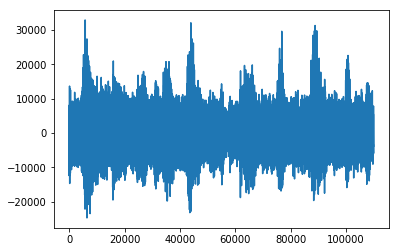

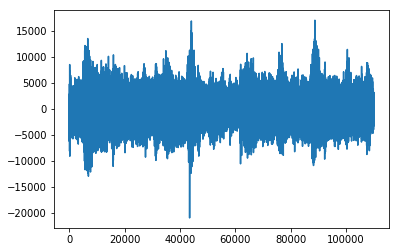

In [82]:
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]

plt.figure(1)
plt.plot(sample1_data)
plt.show()
plt.figure(2)
plt.plot(sample2_data)
plt.show()
#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

mixingMatrix1=np.array([1.1,0.7])
mixingMatrix2=np.array([1.5,0.5])
m=np.matrix([mixingMatrix1,mixingMatrix2])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
#plt.figure(2)
#plt.plot(X1)
#plt.plot(X2)
#plt.show()
X=np.c_[X1,X2]
X=X.T

[[ 0.21780523  0.83529291]
 [ 0.7076479   0.27551543]]


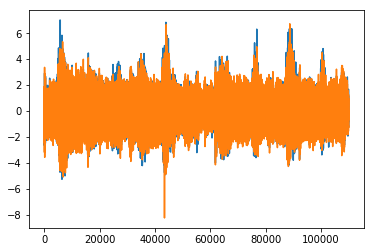

[[ 0.00518995  0.01534434]
 [ 0.01366483  0.01638915]]


In [83]:
eta=0.01
eta0=eta
T=1000
num_iter=20000
W=np.random.random(m.shape)/50
A=np.random.random((2,2))
print(A)

med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2

orig=np.matrix([s1data,s2data])
#X=np.dot(A,orig)
X=orig[:]
plt.figure(1)
plt.plot(X.T)
plt.show()
print(W)
#print("W "+str(W))
#numSrc=X.shape[0]
#print(numSrc)
#print(W)
#print(b)

In [84]:
print(W)
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))
    if i%100==0:
        print("delW "+str(delW))
        print("W "+str(W))
    #print("eta "+str(eta))

[[ 0.00518995  0.01534434]
 [ 0.01366483  0.01638915]]
delW [[-0.00519524 -0.00807677]
 [-0.00747531 -0.01173148]]
W [[ -5.28990720e-06   7.26756941e-03]
 [  6.18952074e-03   4.65767159e-03]]
delW [[ -1.27229975e-05   8.49173425e-06]
 [  5.76438967e-06  -1.05938283e-05]]
W [[-0.00354683  0.00603821]
 [ 0.0047337  -0.00059723]]
delW [[ -2.80792216e-06   2.18505954e-06]
 [  1.53702459e-06  -2.13842565e-06]]
W [[-0.00421589  0.00652626]
 [ 0.00507218 -0.00112769]]
delW [[ -5.51439536e-07   4.37521907e-07]
 [  3.09001037e-07  -4.14548394e-07]]
W [[-0.00435311  0.00663413]
 [ 0.00514822 -0.0012315 ]]
delW [[ -1.16407669e-07   9.26869410e-08]
 [  6.55016657e-08  -8.72857016e-08]]
W [[-0.00438065  0.00665602]
 [ 0.00516368 -0.00125218]]
delW [[ -2.71213974e-08   2.16084338e-08]
 [  1.52673107e-08  -2.03144446e-08]]
W [[-0.00438668  0.00666082]
 [ 0.00516708 -0.0012567 ]]
delW [[ -6.93613310e-09   5.52451111e-09]
 [  3.89833536e-09  -5.18444961e-09]]
W [[-0.00438814  0.00666199]
 [ 0.0051679  

delW [[ -1.56685326e-12   3.81449960e-13]
 [ -1.33053354e-12   2.01985869e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.54478229e-12   3.76076740e-13]
 [ -1.31179150e-12   1.99140666e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.52332446e-12   3.70852795e-13]
 [ -1.29357012e-12   1.96374508e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.50245460e-12   3.65771970e-13]
 [ -1.27584803e-12   1.93684143e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.48214888e-12   3.60828520e-13]
 [ -1.25860496e-12   1.91066499e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.46238469e-12   3.56016895e-13]
 [ -1.24182176e-12   1.88518669e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.44314069e-12   3.51331911e-13]
 [ -1.22548029e-12   1.86037894e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125818]]
delW [[ -1.42439658e-12   3.46768616e-13]

delW [[ -8.43646232e-13   2.05384215e-13]
 [ -7.16405696e-13   1.08756100e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.37205833e-13   2.03816282e-13]
 [ -7.10936667e-13   1.07925856e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.30863021e-13   2.02272119e-13]
 [ -7.05550528e-13   1.07108195e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.24615603e-13   2.00751187e-13]
 [ -7.00245377e-13   1.06302829e-12]]
W [[-0.00438871  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.18461435e-13   1.99252958e-13]
 [ -6.95019414e-13   1.05509485e-12]]
W [[-0.00438872  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.12398446e-13   1.97776923e-13]
 [ -6.89870875e-13   1.04727894e-12]]
W [[-0.00438872  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.06424622e-13   1.96322596e-13]
 [ -6.84798063e-13   1.03957799e-12]]
W [[-0.00438872  0.00666243]
 [ 0.00516819 -0.00125817]]
delW [[ -8.00538012e-13   1.94889502e-13]

delW [[ -5.77222499e-13   1.40523331e-13]
 [ -4.90165378e-13   7.44109544e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.74200304e-13   1.39787577e-13]
 [ -4.87598999e-13   7.40213568e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.71209590e-13   1.39059490e-13]
 [ -4.85059354e-13   7.36358181e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.68249865e-13   1.38338939e-13]
 [ -4.82546024e-13   7.32542744e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.65320657e-13   1.37625824e-13]
 [ -4.80058611e-13   7.28766647e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.62421494e-13   1.36920026e-13]
 [ -4.77596714e-13   7.25029284e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.59551913e-13   1.36221424e-13]
 [ -4.75159927e-13   7.21330051e-13]]
W [[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
delW [[ -5.56711461e-13   1.35529905e-13]

[[-0.00438872  0.00666243]
 [ 0.00516818 -0.00125817]]
[[ 0.03605205  0.02854781]
 [ 0.02491837  0.04519345]
 [ 0.02620498  0.03577757]
 ..., 
 [-0.01501724 -0.01345086]
 [-0.05141355 -0.00827491]
 [-0.04152906 -0.02802363]]


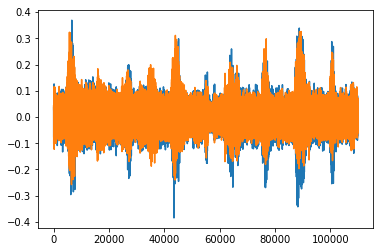

In [85]:
print(W)
#p=np.matrix([W[0],W[1]])
#p[1,1]=0.0268169
#p=p*10
#print(p)
Y2=np.dot(W*10,X)
print(Y2.T)
plt.figure(1)
plt.plot(Y2.T)
plt.show()

In [86]:
Audio(data=X[0], rate=16000)

In [87]:
Audio(data=X[1], rate=16000)

In [88]:
Audio(data=Y2[0], rate=16000)

In [89]:
Audio(data=Y2[1], rate=16000)

In [90]:
Audio(data=sample1_data, rate=16000)

In [91]:
Audio(data=sample2_data, rate=16000)